In [1]:
pip install pandas seaborn matplotlib numpy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [3]:

GDP_Data = pd.read_csv('RGDP_Data.csv', skiprows=3) #this is real GDP n 2015 USD
Capital_Stock_Data = pd.read_csv('Capital_Stock_Data.csv', skiprows=3)
Gross_Savings_Data = pd.read_csv('Gross_Savings_Data.csv', skiprows=3)
Population_Data = pd.read_csv('Population_Data.csv', skiprows=3)
Labor_Force_Data = pd.read_csv('Labor_Force_Data.csv', skiprows=3)

# List of countries to include
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Filter for the selected countries
GDP_Data1 = GDP_Data[GDP_Data['Country Name'].isin(selected_countries)]
Capital_Stock_Data1 = Capital_Stock_Data[Capital_Stock_Data['Country Name'].isin(selected_countries)]
Gross_Savings_Data1 = Gross_Savings_Data[Gross_Savings_Data['Country Name'].isin(selected_countries)]
Population_Data1 = Population_Data[Population_Data['Country Name'].isin(selected_countries)]
Labor_Force_Data1 = Labor_Force_Data[Labor_Force_Data['Country Name'].isin(selected_countries)]

# Select the first three columns, plus the columns within the year range 1992-2023
columns_GDP = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in GDP_Data.columns if col.isdigit() and 1992 <= int(col) <= 2023]

columns_GDI = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Capital_Stock_Data.columns if col.isdigit() and 1992 <= int(col) <= 2023]

columns_Pop = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Population_Data.columns if col.isdigit() and 1990 <= int(col) <= 2023]

columns_savings = ["Country Name", "Country Code", "Indicator Name"] + \
                  [col for col in Gross_Savings_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

columns_labor = ["Country Name", "Country Code", "Indicator Name"] + \
                [col for col in Labor_Force_Data.columns if col.isdigit() and 1990 <= int(col) <= 2023]

# Apply the columns filter to each dataset
GDP_Data2 = GDP_Data1[columns_GDP]
Capital_Stock_Data2 = Capital_Stock_Data1[columns_GDP]
Population_Data2 = Population_Data1[columns_Pop]
Gross_Savings_Data2 = Gross_Savings_Data1[columns_savings]
Labor_Force_Data2 = Labor_Force_Data1[columns_labor]


In [4]:
# Define a function to calculate annual growth starting from 1992 
def calculate_annual_growth(row):
    growth_rates = {}
    # For 1992 to 2023, we compute growth using the previous year
    for year in range(1992, 2024):
        prev_year = str(year - 1)
        current_year = str(year)
        # Check for non-null and numeric data
        if (prev_year in row and current_year in row and
            pd.notnull(row[prev_year]) and pd.notnull(row[current_year]) and
            row[prev_year] != 0):
            growth_rates[current_year] = (row[current_year] - row[prev_year]) / row[prev_year]
        else:
            growth_rates[current_year] = pd.NA
    return pd.Series(growth_rates)

# Create Population Growth Rate Data
Population_Growth_Data = Population_Data2.apply(calculate_annual_growth, axis=1)
Population_Growth_Data = pd.concat([Population_Data2[["Country Name", "Country Code", "Indicator Name"]], Population_Growth_Data], axis=1)
Population_Growth_Data["Indicator Name"] = Population_Growth_Data["Indicator Name"].replace("Population, total", "Pop Annual Growth Rate")

# Create Labor Force Growth Rate Data
Labor_Force_Growth_Data = Labor_Force_Data2.apply(calculate_annual_growth, axis=1)
Labor_Force_Growth_Data = pd.concat([Labor_Force_Data2[["Country Name", "Country Code", "Indicator Name"]], Labor_Force_Growth_Data], axis=1)
Labor_Force_Growth_Data["Indicator Name"] = Labor_Force_Growth_Data["Indicator Name"].replace("Labor force, total", "Labor Annual Growth Rate")

# Define a function to calculate savings rate from total savings and total GDP
def calculate_savings_rate(row):
    savings_rate = {}
    for year in range(1992, 2024):
        year_str = str(year)
        if year_str in row and year_str in GDP_Data2.columns:
            gdp_value = GDP_Data2.loc[row.name, year_str]
            if pd.notnull(gdp_value) and gdp_value != 0 and pd.notnull(row[year_str]):
                savings_rate[year_str] = (row[year_str] / gdp_value)
            else:
                savings_rate[year_str] = pd.NA
        else:
            savings_rate[year_str] = pd.NA
    return pd.Series(savings_rate)

# Create Savings Rate Data
Savings_Rate_Data = Gross_Savings_Data2.iloc[:, 3:].apply(calculate_savings_rate, axis=1)
Savings_Rate_Data = pd.concat([Gross_Savings_Data2[["Country Name", "Country Code", "Indicator Name"]], Savings_Rate_Data], axis=1)

# Save the resulting datasets to an intermediate Excel file
with pd.ExcelWriter('Project_Data.xlsx') as writer:
    GDP_Data2.to_excel(writer, sheet_name='GDP Data', index=False)
    Capital_Stock_Data2.to_excel(writer, sheet_name='Capital Stock Data', index=False)
    Savings_Rate_Data.to_excel(writer, sheet_name='Savings Rate Data', index=False)
    Population_Growth_Data.to_excel(writer, sheet_name='Population Growth Rate Data', index=False)
    Labor_Force_Growth_Data.to_excel(writer, sheet_name='Labour Growth Rate Data', index=False)
    Labor_Force_Data2.to_excel(writer, sheet_name='Labour Data', index=False)
    Population_Data2.to_excel(writer, sheet_name='Population', index=False)

In [5]:
# Load each cleaned dataset
GDP_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='GDP Data')
Capital_Stock_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Capital Stock Data')
Gross_Savings_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Savings Rate Data')
Population_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Population Growth Rate Data')
Labor_Force_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Labour Growth Rate Data')
Labor_Force_Data2_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Labour Data') 
Population_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Population')

# Define a helper function to melt a dataframe from wide to long format
def melt_data(df, value_name):
    id_vars = ["Country Name", "Country Code", "Indicator Name"]
    year_cols = [col for col in df.columns if col.isdigit()]
    df_melted = df.melt(id_vars=id_vars, value_vars=year_cols, var_name="Year", value_name=value_name)
    df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors='coerce')
    df_melted = df_melted.drop(columns=["Indicator Name"])
    return df_melted

# Melt each dataset to long format
gdp_long = melt_data(GDP_Data_Cleaned, "GDP")
capital_long = melt_data(Capital_Stock_Data_Cleaned, "Capital Stock")
savings_long = melt_data(Gross_Savings_Data_Cleaned, "Savings Rate")
population_long = melt_data(Population_Data_Cleaned, "Pop Growth Rate")
labor_long = melt_data(Labor_Force_Data_Cleaned, "Labour Force Growth Rate")
labor_long2 = melt_data(Labor_Force_Data2_Cleaned, "Labour Force")
population_long2 = melt_data(Population_Cleaned, "Population")


# Merge all datasets on Country Name, Country Code, and Year
merged_df = gdp_long.merge(capital_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(savings_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(labor_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(population_long, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(labor_long2, on=["Country Name", "Country Code", "Year"], how="left") \
                    .merge(population_long2, on=["Country Name", "Country Code", "Year"], how="left")

# Sort by Country Name and Year
merged_df.sort_values(["Country Name", "Year"], inplace=True)

# Save the final merged dataset
merged_df.to_excel("Final_Dataset.xlsx", index=False)

In [6]:
df = pd.read_excel("Final_Dataset.xlsx")
df.head()

,Country Name,Country Code,Year,GDP,Capital Stock,Savings Rate,Labour Force Growth Rate,Pop Growth Rate,Labour Force,Population
0,Argentina,ARG,1992,313120000000,3.821158e+10,0.110822,0.029395,0.013971,14275486,33568285
1,Argentina,ARG,1993,338818000000,4.660997e+10,0.120766,0.029565,0.013672,14697546,34027240
2,Argentina,ARG,1994,358592000000,5.139950e+10,0.121265,0.025143,0.013561,15067090,34488696
3,Argentina,ARG,1995,348389000000,4.773693e+10,0.133980,0.008917,0.013263,15201443,34946110
4,Argentina,ARG,1996,367644000000,5.340632e+10,0.140460,0.023820,0.012684,15563537,35389362


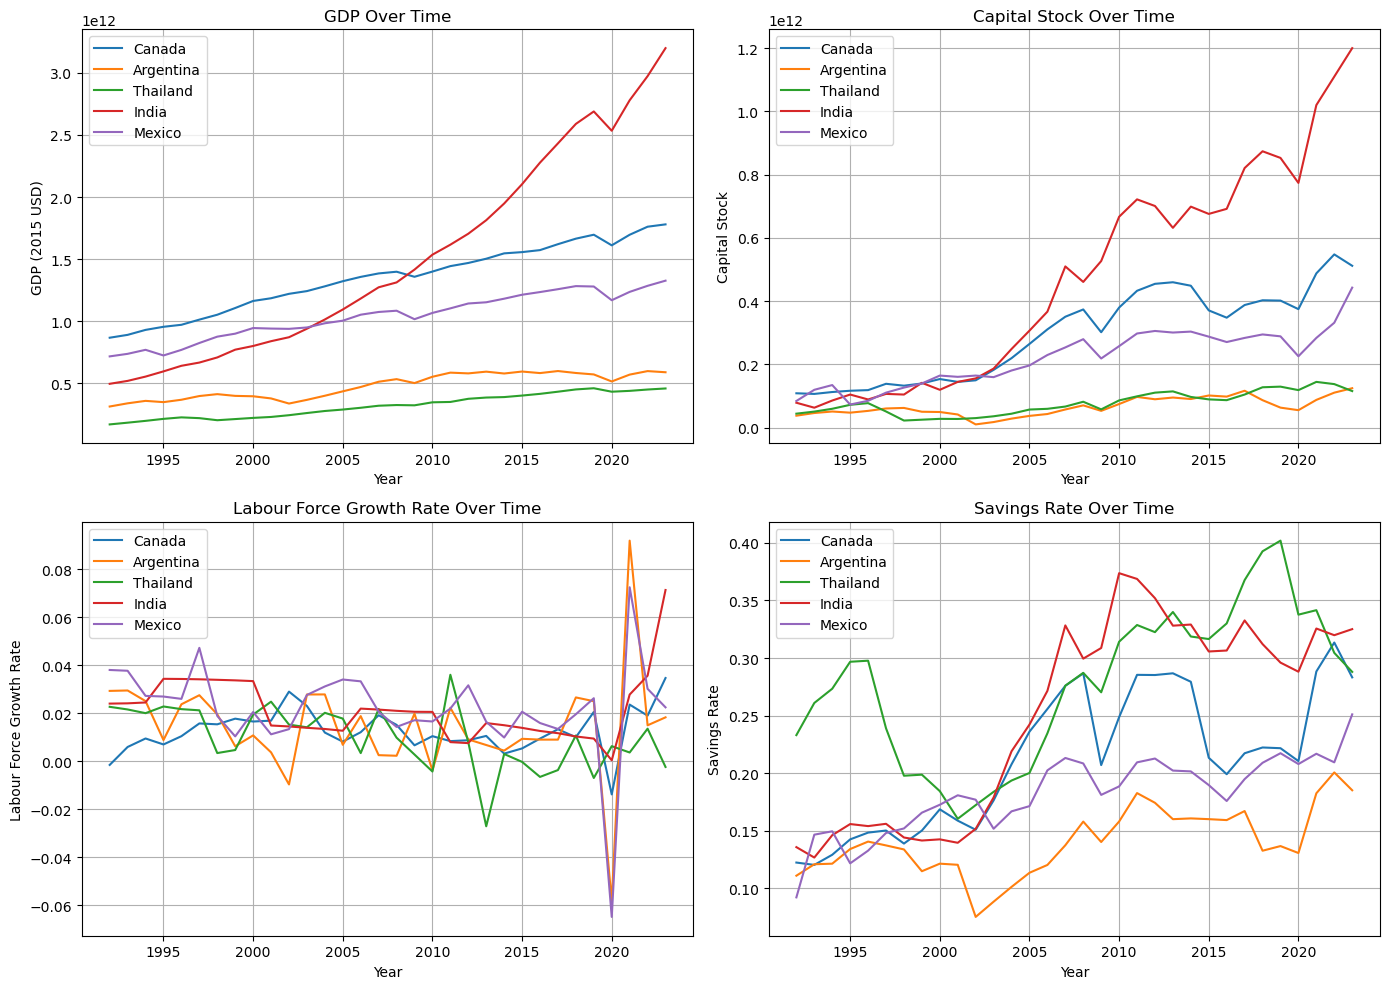

In [7]:
countries_to_plot = ["Canada", "Argentina", "Thailand", "India", "Mexico"]

# Filter the dataframe for these countries
plot_df = df[df["Country Name"].isin(countries_to_plot)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax_gdp, ax_capital, ax_lfg, ax_savings = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# Plot GDP
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_gdp.plot(country_data["Year"], country_data["GDP"], label=country)
ax_gdp.set_title("GDP Over Time")
ax_gdp.set_xlabel("Year")
ax_gdp.set_ylabel("GDP (2015 USD)")
ax_gdp.grid(True)
ax_gdp.legend()

# Plot Capital Stock
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_capital.plot(country_data["Year"], country_data["Capital Stock"], label=country)
ax_capital.set_title("Capital Stock Over Time")
ax_capital.set_xlabel("Year")
ax_capital.set_ylabel("Capital Stock")
ax_capital.grid(True)
ax_capital.legend()

# Plot Labour Force Growth Rate
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_lfg.plot(country_data["Year"], country_data["Labour Force Growth Rate"], label=country)
ax_lfg.set_title("Labour Force Growth Rate Over Time")
ax_lfg.set_xlabel("Year")
ax_lfg.set_ylabel("Labour Force Growth Rate")
ax_lfg.grid(True)
ax_lfg.legend()

# Plot Savings Rate
for country in countries_to_plot:
    country_data = plot_df[plot_df["Country Name"] == country].sort_values("Year")
    ax_savings.plot(country_data["Year"], country_data["Savings Rate"], label=country)
ax_savings.set_title("Savings Rate Over Time")
ax_savings.set_xlabel("Year")
ax_savings.set_ylabel("Savings Rate")
ax_savings.grid(True)
ax_savings.legend()

plt.tight_layout()
plt.show()


# Data Analysis

### Analyzing Economic Interdependence and the Role of Non-Economic Variables in Economic Growth


Before conducting the steady-state analysis, we aim to apply data analytics to explore questions related to **regional and global economic interdependence** and to **regress key non-economic variables** to better understand their dynamics within an economy. Our analysis will be structured into three main parts.

**Part 1: Correlation Analysis of Core Economic Variables**  
First, we will conduct a **correlation analysis** of core economic variables, including **GDP per capita, labor force growth rate, savings rate, population, and capital stock** across countries in our dataset. This analysis will allow us to address key questions about economic interdependence, such as:  

- Firstly, ARE global economies interdependent with one another?
- How strong is the interdependence between specific economies?  
- Which countries exhibit the highest and lowest degrees of economic interdependence?  
- How does the level of interdependence differ between high-income, middle-income, and low-income countries?
- How has economic interdependence evolved over time (are countries more dependent today or in the past)?

**Part 2: Regional Correlation Analysis**  

It is important to note that **correlation does not imply causation**, and it would be overly simplistic to equate correlation with true economic interdependence. However, for the purposes of this analysis, we will operate under the assumption that a high correlation between the core economic variables of two countries reflects a degree of economic interdependence.

Our approach begins by **classifying countries into regional groups** and conducting a **regional correlation analysis**. This analysis will be carried out in two stages. First, we will analyze the correlation of core economic variables within each region, such as **the EU, Middle East, Asia, and Latin America**, to identify which regions exhibit the highest levels of internal economic interdependence. Second, we will conduct a cross-regional analysis to measure the correlation of core economic variables between regions, providing insight into cross-regional linkages.

This analysis will allow us to answer key questions, such as:  
- Which regions (e.g., EU, Middle East, Asia) exhibit the highest and lowest levels of internal economic interdependence?  
- Which regional pairings (e.g., EU-Middle East, Asia-Latin America) exhibit the strongest cross-regional economic interdependence?  

Additionally, given the influence of major global powers, we will analyze the extent of economic interdependence between **the USA and China**—the two most influential economies—and each of the regional groups. This will allow us to determine the degree to which these global powers are economically linked with different regions, shedding light on the global structure of economic interdependence.


**Part 3: Regression Analysis of Non-Economic Variables**  
In the third section, we will incorporate key non-economic variables that are hypothesized to influence economic growth. Specifically, we will import data on the following variables:  
- **Freedom House Index** (which measures political rights and civil liberties)  
- **Life Expectancy Rate**  
- **Literacy Rate**  
- **Gini Coefficient** (which measures income inequality)  
- **V-Dem measure of regime types**  

These variables will be regressed on key economic outcomes, including:  
- **GDP** (to understand the direct relationship between these variables and economic growth)  
- **GDP per capita** (as a measure of welfare, beyond economic growth)  
- **Savings rate** (to explore whether certain regime types or social conditions influence a country's propensity to save)  

This three-part analysis aims to provide a comprehensive view of economic interdependence and the role of non-economic variables in shaping key economic outcomes.


In [8]:
# Cell 1: Correlation Matrix Table of GDP Across All Countries

# Load the final merged dataset
merged_df0 = pd.read_excel("Final_Dataset.xlsx")

# Check if required columns exist
required_columns = ['Country Name', 'Year', 'GDP']
missing_columns = [col for col in required_columns if col not in merged_df.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing from the dataset: {missing_columns}")

# Pivot the data to have countries as columns and years as rows
gdp_pivot = merged_df0.pivot(index='Year', columns='Country Name', values='GDP')

# Compute the correlation matrix
corr_matrix = gdp_pivot.corr()

print(f"Correlation Matrix of GDP Across {len(corr_matrix.columns)} Countries:")
display(corr_matrix)


Correlation Matrix of GDP Across 24 Countries:


Country Name,Argentina,Australia,Bangladesh,Brazil,Canada,China,Colombia,Germany,Greece,India,...,Mexico,Mozambique,Poland,Rwanda,Saudi Arabia,South Africa,Tanzania,Thailand,Uganda,United States
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.914529,0.831901,0.968775,0.909290,0.872942,0.921563,0.909594,0.266576,0.871224,...,0.925215,0.911198,0.896283,0.848965,0.917211,0.960309,0.862160,0.929381,0.893915,0.891345
Australia,0.914529,1.000000,0.964419,0.966339,0.992413,0.977414,0.983905,0.989933,0.266677,0.979456,...,0.980347,0.992425,0.993625,0.967060,0.978339,0.978931,0.976976,0.988871,0.989039,0.993377
Bangladesh,0.831901,0.964419,1.000000,0.889631,0.935639,0.994922,0.977118,0.954028,0.091065,0.994369,...,0.913459,0.974315,0.984122,0.995113,0.972897,0.901535,0.996360,0.951017,0.989124,0.954394
Brazil,0.968775,0.966339,0.889631,1.000000,0.963319,0.921134,0.953856,0.949928,0.303221,0.917868,...,0.957701,0.954329,0.945866,0.902572,0.946810,0.988928,0.913857,0.967767,0.943781,0.947514
Canada,0.909290,0.992413,0.935639,0.963319,1.000000,0.949373,0.962783,0.989147,0.353004,0.955490,...,0.991143,0.974396,0.978896,0.938504,0.955001,0.980381,0.950167,0.977382,0.966093,0.996151
China,0.872942,0.977414,0.994922,0.921134,0.949373,1.000000,0.990588,0.967936,0.094016,0.997807,...,0.932418,0.989752,0.990209,0.994586,0.988619,0.931878,0.999247,0.972334,0.997059,0.961558
Colombia,0.921563,0.983905,0.977118,0.953856,0.962783,0.990588,1.000000,0.975926,0.137443,0.990357,...,0.953626,0.993359,0.988262,0.981407,0.995727,0.960591,0.987575,0.985313,0.992972,0.966363
Germany,0.909594,0.989933,0.954028,0.949928,0.989147,0.967936,0.975926,1.000000,0.252938,0.972818,...,0.986566,0.985072,0.985201,0.956245,0.971191,0.971568,0.967967,0.982143,0.977058,0.988593
Greece,0.266576,0.266677,0.091065,0.303221,0.353004,0.094016,0.137443,0.252938,1.000000,0.117138,...,0.337506,0.163880,0.216069,0.097790,0.107381,0.336197,0.105366,0.222395,0.152820,0.331279


**Here we found an issue that most countries were far too correlated. This means that the dimension of time was causing this issue because if all countries are growing throughout time, then our estimation of correlation between these countries will be inflated. So, to adjust for this, we will instead find GDP growth rate and then do our correlation based on that. This will resolve the inflated results due to time, and we should actually be able to see the true correlation of economic growth between these countries.**

In [9]:
# Load the final merged dataset again
merged_df = pd.read_excel("Final_Dataset.xlsx")

# Calculate GDP Growth Rate
merged_df = merged_df.sort_values(['Country Name', 'Year'])
merged_df['GDP Growth Rate'] = merged_df.groupby('Country Name')['GDP'].pct_change()

merged_df.head()

,Country Name,Country Code,Year,GDP,Capital Stock,Savings Rate,Labour Force Growth Rate,Pop Growth Rate,Labour Force,Population,GDP Growth Rate
0,Argentina,ARG,1992,313120000000,3.821158e+10,0.110822,0.029395,0.013971,14275486,33568285,NaN
1,Argentina,ARG,1993,338818000000,4.660997e+10,0.120766,0.029565,0.013672,14697546,34027240,0.082071
2,Argentina,ARG,1994,358592000000,5.139950e+10,0.121265,0.025143,0.013561,15067090,34488696,0.058362
3,Argentina,ARG,1995,348389000000,4.773693e+10,0.133980,0.008917,0.013263,15201443,34946110,-0.028453
4,Argentina,ARG,1996,367644000000,5.340632e+10,0.140460,0.023820,0.012684,15563537,35389362,0.055269


In [10]:
# Pivot the data to have countries as columns and years as rows
gdp_growth_pivot = merged_df.pivot(index='Year', columns='Country Name', values='GDP Growth Rate')

# Compute the correlation matrix
corr_matrix = gdp_growth_pivot.corr()

print(f"Correlation Matrix of GDP Growth Rate Across {len(corr_matrix.columns)} Countries:")
display(corr_matrix)

Correlation Matrix of GDP Growth Rate Across 24 Countries:


Country Name,Argentina,Australia,Bangladesh,Brazil,Canada,China,Colombia,Germany,Greece,India,...,Mexico,Mozambique,Poland,Rwanda,Saudi Arabia,South Africa,Tanzania,Thailand,Uganda,United States
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.260605,0.233902,0.568928,0.460639,0.535874,0.657506,0.487724,0.256196,0.456203,...,0.651748,0.227704,0.535593,-0.131259,0.600226,0.589480,0.074510,0.230487,0.113239,0.520130
Australia,0.260605,1.000000,-0.111669,0.406826,0.662421,0.373215,0.225163,0.291755,0.463746,0.395531,...,0.520240,0.477649,0.474890,0.018990,0.111828,0.542414,-0.116333,0.344751,0.337007,0.575944
Bangladesh,0.233902,-0.111669,1.000000,-0.012852,0.160198,-0.144368,0.454476,0.409638,0.056038,0.382999,...,0.212911,-0.274126,0.307001,0.291335,0.400330,0.204928,0.478275,0.048495,-0.105384,0.107945
Brazil,0.568928,0.406826,-0.012852,1.000000,0.537085,0.622540,0.623343,0.414089,0.206367,0.236883,...,0.384925,0.129632,0.398553,-0.074631,0.267051,0.675053,-0.014347,0.467813,0.342838,0.336492
Canada,0.460639,0.662421,0.160198,0.537085,1.000000,0.310687,0.517697,0.749609,0.551001,0.501700,...,0.740486,0.264033,0.601758,-0.023571,0.292149,0.708079,0.057417,0.329696,0.066461,0.862470
China,0.535874,0.373215,-0.144368,0.622540,0.310687,1.000000,0.492716,0.240229,0.148295,0.369503,...,0.236499,0.443421,0.442576,-0.173387,0.088422,0.650711,0.017685,0.533812,0.603099,0.253037
Colombia,0.657506,0.225163,0.454476,0.623343,0.517697,0.492716,1.000000,0.497067,0.295575,0.521208,...,0.443505,0.050679,0.564512,0.030897,0.567780,0.690758,0.207944,0.405214,0.205349,0.377324
Germany,0.487724,0.291755,0.409638,0.414089,0.749609,0.240229,0.497067,1.000000,0.301998,0.405262,...,0.675602,0.126032,0.557718,0.059368,0.395164,0.636277,0.272388,0.244181,0.086253,0.644233
Greece,0.256196,0.463746,0.056038,0.206367,0.551001,0.148295,0.295575,0.301998,1.000000,0.419908,...,0.392244,0.191352,0.522968,0.113830,0.031988,0.505600,0.038298,0.156861,0.088461,0.590810


**These results are more accurate. One way we can tell is by looking at the correlation between some countries which we know are highly correlated. Like US-Canada which we see have a correlation of 0.86 which is strong. Two things to notice are even countries that we would expect to have very high correlations like China-India don't and this can be because maybe they were less dependent in the past, which is making the correlation value go down. Lets check this by isolating China-India correlation throughout time.**

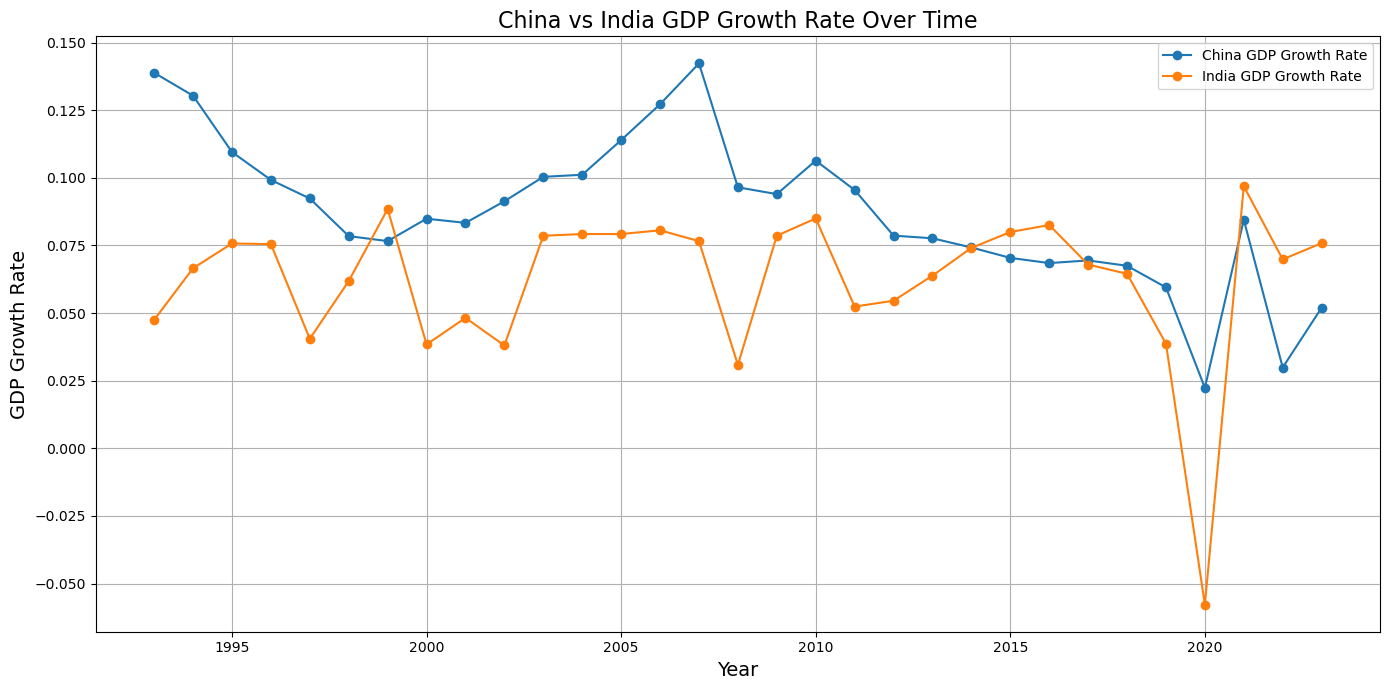

In [11]:
# Cell 2: Correlation Between China and India GDP Growth Rate Over Time

# Select China and India GDP Growth Rate
china_growth = gdp_growth_pivot['China']
india_growth = gdp_growth_pivot['India']

# Drop years where either China or India has NaN GDP Growth Rate
growth_df = pd.DataFrame({
    'China GDP Growth Rate': china_growth,
    'India GDP Growth Rate': india_growth,
}).dropna()

# Plot the GDP Growth Rates of China and India over time
plt.figure(figsize=(14, 7))
plt.plot(growth_df.index, growth_df['China GDP Growth Rate'], label='China GDP Growth Rate', marker='o')
plt.plot(growth_df.index, growth_df['India GDP Growth Rate'], label='India GDP Growth Rate', marker='o')
plt.title('China vs India GDP Growth Rate Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Our guess was correct as we see that China and India correlation is much higher in the past few years than in the past. We can see this because China and India are moving similarly last few years than in the past. Now, lets try to group these correlations by different income levels.**

In [12]:
# Cell 2: Identifying Most and Least Correlated Countries & Correlation by Income Groups

# Compute the correlation matrix
corr_matrix = gdp_growth_pivot.corr()

# List of countries to analyze for most and least correlated
countries_of_interest = ["United States", "China", "Egypt"]

# Function to get top 5 most and least correlated countries for a given country
def get_top_correlations(corr_matrix, country, top_n=5):
    if country not in corr_matrix.columns:
        print(f"{country} not found in the correlation matrix.")
        return pd.Series(dtype='float'), pd.Series(dtype='float')
    sorted_corr = corr_matrix[country].sort_values(ascending=False)
    top_corr = sorted_corr[sorted_corr.index != country].head(top_n)
    bottom_corr = sorted_corr.tail(top_n)
    return top_corr, bottom_corr

# Display the top 5 most and least correlated countries for each country of interest
for country in countries_of_interest:
    top_corr, bottom_corr = get_top_correlations(corr_matrix, country)
    print(f"\nTop 5 Countries Most Correlated with {country}:")
    print(top_corr)
    print(f"\nTop 5 Countries Least Correlated with {country}:")
    print(bottom_corr)

# Define income groups based on World Bank classifications
high_income = ["United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia"]
middle_income = ["Poland", "Greece", "Brazil", "China", "South Africa", "Russia", "Argentina", 
                "Mexico", "Turkey", "Thailand", "Colombia", "India", "Egypt", "Bangladesh", 
                "Vietnam", "Kenya", "Indonesia"]
low_income = ["Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"]


#################################################### FROM HERE ###############################################

# Create a dictionary for income groups
income_groups = {
    "High Income": high_income,
    "Middle Income": middle_income,
    "Low Income": low_income
}

# Get the list of all available countries in the correlation matrix
available_countries = corr_matrix.columns.tolist()

# Adjust income groups to include only available countries
for group in income_groups:
    income_groups[group] = [country for country in income_groups[group] if country in available_countries]

# Function to plot correlation heatmap for a given group
def plot_income_correlation(group_name, countries):
    # Ensure that the countries exist in the correlation matrix
    if not countries:
        print(f"No available countries found for {group_name} group.")
        return
    group_corr = corr_matrix.loc[countries, countries]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(group_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True)
    plt.title(f'Correlation Heatmap for {group_name} Countries', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmaps for each income group
for group, countries in income_groups.items():
    plot_income_correlation(group, countries)

# Additionally, analyze average correlations between different income groups
group_names = list(income_groups.keys())
average_corr_between_groups = pd.DataFrame(index=group_names, columns=group_names)

for group1 in group_names:
    for group2 in group_names:
        # Select the relevant subset of the correlation matrix
        subset = corr_matrix.loc[income_groups[group1], income_groups[group2]]
        # Convert to numpy array and exclude self-correlations if same group
        if group1 == group2:
            mask = ~np.eye(len(subset), dtype=bool)
            subset_values = subset.values[mask]
        else:
            subset_values = subset.values.flatten()
        # Remove NaN values
        subset_values = subset_values[~np.isnan(subset_values)]
        # Calculate the average correlation
        if len(subset_values) > 0:
            avg_corr = np.mean(subset_values)
            average_corr_between_groups.loc[group1, group2] = round(avg_corr, 2)
        else:
            average_corr_between_groups.loc[group1, group2] = np.nan

################################################# TO HERE, TOO COMPLEX #######################################

print("\nAverage Correlation Between Income Groups:")
display(average_corr_between_groups.astype(float))

# Plot the average correlation heatmap between income groups
plt.figure(figsize=(8, 6))
sns.heatmap(average_corr_between_groups.astype(float), annot=True, fmt=".2f", cmap='viridis', linewidths=.5, square=True)
plt.title('Average Correlation Between Income Groups', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Top 5 Countries Most Correlated with United States:
Country Name
Canada          0.862470
Mexico          0.777294
Japan           0.696506
Germany         0.644233
South Africa    0.600935
Name: United States, dtype: float64

Top 5 Countries Least Correlated with United States:
Country Name
Bangladesh    0.107945
Uganda       -0.013848
Rwanda       -0.021094
Indonesia    -0.039793
Tanzania     -0.059620
Name: United States, dtype: float64

Top 5 Countries Most Correlated with China:
Country Name
South Africa    0.650711
Brazil          0.622540
Uganda          0.603099
Argentina       0.535874
Thailand        0.533812
Name: China, dtype: float64

Top 5 Countries Least Correlated with China:
Country Name
Kenya           0.104759
Saudi Arabia    0.088422
Tanzania        0.017685
Bangladesh     -0.144368
Rwanda         -0.173387
Name: China, dtype: float64
Egypt not found in the correlation matrix.

Top 5 Countries Most Correlated with Egypt:
Series([], dtype: float64)

Top 5 Countries 

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

**From this, we can see that...**

**Second, we will split our countries into regions and check correlation within and between regions**

In [ ]:
# Define regional groupings based on the countries in the dataset
regions = {
    "North America": ["United States", "Canada", "Mexico"],
    "Latin America": ["Brazil", "Argentina", "Mexico", "Colombia"],
    "Asia": ["China", "India", "Japan", "Thailand", "Vietnam", "Indonesia"]
}

# Filter regions to only include countries that exist in the pivot table
for region in regions:
    regions[region] = [country for country in regions[region] if country in gdp_growth_pivot.columns]

# Determine the global min and max correlation values for consistent color scaling
global_min = float('1')
global_max = float('-1')

for region, countries in regions.items():
    if len(countries) > 1:
        region_corr = gdp_growth_pivot[countries].corr()
        local_min = region_corr.min().min()
        local_max = region_corr.max().max()
        global_min = min(global_min, local_min)
        global_max = max(global_max, local_max)

# Internal regional correlation analysis for North America, Asia, and Latin America
internal_regional_corr = {}
heatmap_regions = ['North America', 'Latin America', 'Asia']

for region in heatmap_regions:
    countries = regions[region]
    if len(countries) > 1:
        region_corr = gdp_growth_pivot[countries].corr()
        avg_corr = region_corr.where(~region_corr.isna()).stack().mean()  # Average correlation excluding NaN
        internal_regional_corr[region] = avg_corr
        # Plot the heatmap with consistent color scaling
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            region_corr,
            annot=True,
            fmt=".2f",
            cmap="YlOrBr",
            linewidths=0.5,
            vmin=global_min,
            vmax=global_max,
            cbar_kws={'label': 'Correlation'}
        )
        plt.title(f"Internal Correlation Heatmap: {region}", fontsize=16)
        plt.tight_layout()
        plt.show()

# Display internal regional interdependence
print("Average Internal Economic Correlation by Region:")
for region, corr in internal_regional_corr.items():
    print(f"{region}: {corr:.2f}")
    
# Cross-regional correlation analysis (avoid duplicates)
cross_regional_corr = {}
regions_pairs = [(r1, r2) for idx, r1 in enumerate(regions) for r2 in list(regions)[idx + 1:]]

for r1, r2 in regions_pairs:
    countries_r1 = regions[r1]
    countries_r2 = regions[r2]
    if countries_r1 and countries_r2:
        subset_corr = gdp_growth_pivot[countries_r1].corrwith(gdp_growth_pivot[countries_r2].mean(axis=1))
        avg_cross_corr = subset_corr.mean()
        cross_regional_corr[(r1, r2)] = avg_cross_corr

# Display cross-regional interdependence
print("\nAverage Cross-Regional Economic Correlation:")
for pair, corr in cross_regional_corr.items():
    print(f"{pair[0]}-{pair[1]}: {corr:.2f}")

# Plot the results as a heatmap for cross-regional economic interdependence
cross_regional_corr_df = pd.DataFrame(
    [
        {"Region Pair": f"{r1}-{r2}", "Correlation": corr}
        for (r1, r2), corr in cross_regional_corr.items()
    ]
)

plt.figure(figsize=(10, 8))
sns.barplot(
    x="Correlation",
    y="Region Pair",
    data=cross_regional_corr_df,
    palette="viridis"
)
plt.title("Cross-Regional Economic Correlation", fontsize=16)
plt.xlabel("Average Correlation", fontsize=12)
plt.ylabel("Region Pair", fontsize=12)
plt.tight_layout()
plt.show()

**From this, we can see that...**

**Finally, we will now...**

In [ ]:
# File path (update this path if the file is in a different location)
file_path = 'HRI VDEM.csv'  # Make sure the file is in the same directory or provide the full path

#this is from https://ourworldindata.org/grapher/human-rights-index-vdem##

# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Load the dataset
df = pd.read_csv(file_path)

# Filter the dataset for the years 1992-2023 and the selected countries
filtered_df = df[(df['Year'].between(1992, 2023)) & (df['Entity'].isin(selected_countries))]

# Keep only the specified columns and rename 'Entity' to 'Country'
filtered_df = filtered_df[['Entity', 'Code', 'Year', 'Civil liberties index (best estimate, aggregate: average)']]
filtered_df.rename(columns={'Entity': 'Country', 'Civil liberties index (best estimate, aggregate: average)': 'Civil Liberties Index'}, inplace=True)

# Display the cleaned dataframe (optional)
print(filtered_df.head())

# Save the cleaned data to a new CSV file (optional)
filtered_df.to_csv('cleaned_HRI_VDEM.csv', index=False)

# File path (update this path if the file is in a different location)
file_path = 'economic-inequality-gini-index.csv'  # Make sure the file is in the same directory or provide the full path

#https://ourworldindata.org/grapher/economic-inequality-gini-index#

# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Load the dataset
df = pd.read_csv(file_path)

# Filter the dataset for the years 1992-2023 and the selected countries
filtered_df = df[(df['Year'].between(1992, 2023)) & (df['Entity'].isin(selected_countries))]

# Keep only the specified columns and rename 'Entity' to 'Country'
filtered_df = filtered_df[['Entity', 'Code', 'Year', 'Gini coefficient']]
filtered_df.rename(columns={'Entity': 'Country'}, inplace=True)

# Display the cleaned dataframe (optional)
print(filtered_df.head())

# Save the cleaned data to a new CSV file (optional)
filtered_df.to_csv('cleaned_gini_index.csv', index=False)

# File path (update this path if the file is in a different location)
file_path = 'life-expectancy.csv'  # Make sure the file is in the same directory or provide the full path

# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# File path (update this path if the file is in a different location)
file_path = 'life-expectancy.csv'  # Update this path if necessary

#https://ourworldindata.org/life-expectancy#

# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Load the dataset
df = pd.read_csv(file_path)

# Identify the column with the data values (exclude 'Entity', 'Code', 'Year')
data_value_col = [col for col in df.columns if col not in ['Entity', 'Code', 'Year']][0]

# Filter for the years 1992-2023 and the selected countries
filtered_df = df[(df['Year'].between(1992, 2023)) & (df['Entity'].isin(selected_countries))]

# Keep only relevant columns and rename 'Entity' to 'Country'
filtered_df = filtered_df[['Entity', 'Code', 'Year', data_value_col]]
filtered_df.rename(columns={'Entity': 'Country'}, inplace=True)

# Save the cleaned data to a new CSV file (optional)
filtered_df.to_csv('cleaned_life_expectancy.csv', index=False)

# Display first few rows (optional)
print(filtered_df.head())

import pandas as pd

# File path (update this path if necessary)
file_path = 'political-regime.csv'  # Update this path if necessary

#https://ourworldindata.org/grapher/political-regime#

# List of selected countries
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Load the dataset
df = pd.read_csv(file_path)

# Identify the column with the data values (exclude 'Entity', 'Code', 'Year')
data_value_col = [col for col in df.columns if col not in ['Entity', 'Code', 'Year']][0]

# Filter for the years 1992-2023 and the selected countries
filtered_df = df[(df['Year'].between(1992, 2023)) & (df['Entity'].isin(selected_countries))]

# Keep only relevant columns and rename 'Entity' to 'Country'
filtered_df = filtered_df[['Entity', 'Code', 'Year', data_value_col]]
filtered_df.rename(columns={'Entity': 'Country'}, inplace=True)

# Save the cleaned data to a new CSV file (optional)
filtered_df.to_csv('cleaned_political_regime.csv', index=False)

# Display first few rows (optional)
print(filtered_df.head())

##note here 0 is closed autocracy, 1 is electoral autocracy, 2 is electoral democracy, 3 is liberal democracy#


In [ ]:
import pandas as pd

# File paths for the cleaned CSV files
gini_path = 'cleaned_gini_index.csv'
hri_path = 'cleaned_HRI_VDEM.csv'
life_expectancy_path = 'cleaned_life_expectancy.csv'
political_regime_path = 'cleaned_political_regime.csv'

# Load the cleaned CSV files
gini_df = pd.read_csv(gini_path)
hri_df = pd.read_csv(hri_path)
life_expectancy_df = pd.read_csv(life_expectancy_path)
political_regime_df = pd.read_csv(political_regime_path)

# Merge the datasets on 'Country', 'Year', and 'Code'
combined_df = gini_df.merge(hri_df, on=['Country', 'Year', 'Code'], how='outer')
combined_df = combined_df.merge(life_expectancy_df, on=['Country', 'Year', 'Code'], how='outer')
combined_df = combined_df.merge(political_regime_df, on=['Country', 'Year', 'Code'], how='outer')

# Save the combined data to a new CSV file
combined_df.to_csv('combined_dataset.csv', index=False)

# Display the first few rows of the combined dataframe (optional)
print(combined_df.head())


In [ ]:
import pandas as pd

# File paths for the datasets
combined_path = 'combined_dataset.csv'
final_dataset_path = 'Final_Dataset.xlsx'

# Step 1: Rename 'Country' to 'Country Name' in combined_dataset.csv
combined_df = pd.read_csv(combined_path)
combined_df.rename(columns={'Country': 'Country Name', 'Code': 'Country Code'}, inplace=True)
combined_df.to_csv('combined_dataset.csv', index=False)  # Save the updated file

# Step 2: Load the updated combined dataset and the Final_Dataset
combined_df = pd.read_csv(combined_path)
final_df = pd.read_excel(final_dataset_path)

# Step 3: Merge the datasets on 'Country Name', 'Year', and 'Code'
merged_df = combined_df.merge(final_df, on=['Country Name', 'Year', 'Country Code'])

# Step 4: Save the merged data to a new CSV file
merged_df.to_csv('final_merged_dataset.csv', index=False)

# Display the first few rows of the merged dataframe (optional)
print(merged_df.head())


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# File path for the final dataset
file_path = 'final_merged_dataset.csv'

# Load the final merged dataset
df = pd.read_csv(file_path)

# Drop rows with missing values in the relevant columns
df = df[['GDP', 'Civil Liberties Index', 'Life Expectency']].dropna()

# Define the dependent variable (y) and independent variables (X)
X = df[['Civil Liberties Index', 'Life Expectency']]
y = df['GDP']

# Initialize and fit the Linear Regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Predict on the same dataset (since we're not splitting)
y_pred = model.predict(X)

# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

# Calculate and print the performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


**Interpret results**

# Formula

To make a prediction model for a country's steady state condition, we must first define the steady-state condition of a economy. The idea focuses on the Cobb-Douglas function which we are familiar with (from lectures).

$$Y = F(K, L) = AL^{\alpha}K^{1-\alpha}$$
Where $Y$ denotes economic output, $A$ denotes total factor productivity (which can be interpreted as technological level), $L$ denotes labor, $K$ denotes capital and $\alpha$ denotes labor elasticity of output (making $1-\alpha$ the capital elasticity of output).

Y denotes output of the economy, we can denote the output per worker (labor) as 
$$\frac{Y}{L} = \frac{AK^{\alpha}L^{1-\alpha}}{L}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}L}{LL^{\alpha}}$$
$$\frac{Y}{L} = \frac{AK^{\alpha}}{L^{\alpha}}$$
$$\frac{Y}{L} = A(\frac{K}{L})^{\alpha}$$

In economics, variables divided by labor are interpreted as the growth rate of that variable (if applicable), growth rates are typically denoted as the lower case of its associated variable. Therefore, we can represent growth rate of output as:
$$y = Ak^{\alpha}$$

Our goal is to approximate the steady state condition of the economy, which occurs at equilibrium. Equilibrium condition states that saving and investment are equal, which means (according to neoclassical growth theory) the saving rate and investment are equal.

We denote the savings rate as $s = \frac{S}{L}$ and investment rate as $i = \frac{I}{L}$, but to fit this into our model, we must first understand the law of motion for capital.

First, we define our investment-saving identity:
$$S = I = sY$$

Which means savings rate is:
$$s = S/Y$$

In discrete time `t`, the law of motion defines capital stock in thefuture period as: 
$$K_{t+1} = I + (1-\delta)K$$

Where $\delta$ is the depreciation rate of capital in the economy. Solow's model states that capital stock evolves by reinvestment that replaces depreciating capital, as capital grows from investment but declines from depreciation. This concept was used by Solow to derive the process of **capital accumulation** in the economy, which can be described as the "engine" of growth. 

We can denote labour growth rate as $N/L = n$, the rate of effective depreciation of capital can be described as $n + \delta$. Avoiding tedious proof, Solow's growth equation is stated as a definiting for capital accumulation (denoted as $\dot{k}$): 
$$\dot{k} = sy - (\delta + n)k$$

Solow states that steady condition is when capital accumulation is 0, which can be interpreted as the effective depreciation of capital being offset by saving in the economy.
$$0 = sy - (\delta + n)k$$
$$sy = (\delta + n)k$$

Subbing in our $y$ from above:

$$sAk^{\alpha} =(\delta + n)k$$

We find steady-state capital per worker by isolating $k$, and after some algebra we get: 
$$k_{ss}^{*} = (\frac{sA}{n+\delta})^{\frac{1}{1-\alpha}}$$

**Definitions and Default Values:**
- \(k*\): Steady-state capital per worker.
- \(s\): Saving rate (fraction of output saved and invested).
- \(A\): Total factor productivity. (Default value often set to 1)
- \(n\): Labour growth rate.
- \(δ): Depreciation rate of capital. (Typically \(δ = 0.05\))
- \(α): Capital share of output. (Often \(α = 0.3\))



**Calculating Steady-State Capital per Worker (k)**

In [29]:
df = pd.read_excel("Final_Dataset.xlsx")

# Constants
A = 1  # Total factor productivity
delta = 0.05  # Depreciation rate
alpha = 0.3  # Capital share of output
s_f = 0.3
n_f = 0.02

# Compute average savings rate (s_fixed) and labor growth rate (n_fixed) for each country
savings_avg = df.groupby("Country Name")["Savings Rate"].mean()
labor_growth_avg = df.groupby("Country Name")["Labour Force Growth Rate"].mean()

# Merge these averages into the main dataset
df = df.merge(savings_avg.rename("s_fixed"), on="Country Name", how="left")
df = df.merge(labor_growth_avg.rename("n_fixed"), on="Country Name", how="left")

# Calculate steady-state capital per worker (k_ss)
df["Steady-State K"] = (((df["s_fixed"] * A) / (df["n_fixed"] + delta)) ** (1 / (1 - alpha)))

df["SSK"] = (((s_f * A) / (n_f + delta)) ** (1 / (1 - alpha)))/100

# Compute k(t) = Capital Stock / Labour Force
df["k_t"] = df["Capital Stock"] / df["Labour Force"]

# Initialize an array to store k(t+1)
k_t_plus_1 = []

# Apply the law of motion for capital
for _, group in df.groupby("Country Name"):
    k_t_country = group["k_t"].values
    savings_rate = group["Savings Rate"].values
    labor_growth_rate = group["Labour Force Growth Rate"].values
    k_t_plus_1_country = []
    for t in range(len(k_t_country) - 1):
        k_current = k_t_country[t]
        s_t = savings_rate[t]
        n_t = labor_growth_rate[t]
        # Law of motion: k(t+1) = s_t * A * k(t)^alpha + (1 - delta - n_t) * k(t)
        k_next = s_t * A * (k_current**alpha) + (1 - delta - n_t) * k_current
        k_t_plus_1_country.append(k_next)
    k_t_plus_1_country.append(None)  # The last year does not have k(t+1)
    k_t_plus_1.extend(k_t_plus_1_country)

# Add k(t+1) to the dataset
df["k_t+1"] = k_t_plus_1

df["K Growth Rate"] = (df["Capital Stock"]).pct_change()

df.head(35)


,Country Name,Country Code,Year,GDP,Capital Stock,Savings Rate,Labour Force Growth Rate,Pop Growth Rate,Labour Force,Population,s_fixed,n_fixed,Steady-State K,SSK,k_t,k_t+1,K Growth Rate
0,Argentina,ARG,1992,313120000000,3.821158e+10,0.110822,0.029395,0.013971,14275486,33568285,0.139889,0.014616,3.014450,0.079963,2676.727300,2465.392161,NaN
1,Argentina,ARG,1993,338818000000,4.660997e+10,0.120766,0.029565,0.013672,14697546,34027240,0.139889,0.014616,3.014450,0.079963,3171.275686,2920.308138,0.219786
2,Argentina,ARG,1994,358592000000,5.139950e+10,0.121265,0.025143,0.013561,15067090,34488696,0.139889,0.014616,3.014450,0.079963,3411.375422,3156.425523,0.102758
3,Argentina,ARG,1995,348389000000,4.773693e+10,0.133980,0.008917,0.013263,15201443,34946110,0.139889,0.014616,3.014450,0.079963,3140.289576,2956.773328,-0.071257
4,Argentina,ARG,1996,367644000000,5.340632e+10,0.140460,0.023820,0.012684,15563537,35389362,0.139889,0.014616,3.014450,0.079963,3431.502736,3179.805287,0.118763
5,Argentina,ARG,1997,397464000000,6.099097e+10,0.137134,0.027593,0.012055,15992986,35815971,0.139889,0.014616,3.014450,0.079963,3813.607184,3519.324494,0.142018
6,Argentina,ARG,1998,412767000000,6.269175e+10,0.133638,0.019637,0.011649,16307035,36233195,0.139889,0.014616,3.014450,0.079963,3844.460222,3578.334756,0.027886
7,Argentina,ARG,1999,398793000000,5.064551e+10,0.114709,0.006334,0.011587,16410324,36653031,0.139889,0.014616,3.014450,0.079963,3086.197993,2913.617756,-0.192150
8,Argentina,ARG,2000,395646000000,4.983083e+10,0.121281,0.010854,0.011397,16588444,37070774,0.139889,0.014616,3.014450,0.079963,3003.948339,2822.485626,-0.016086
9,Argentina,ARG,2001,378203000000,4.198646e+10,0.120293,0.003784,0.011052,16651214,37480493,0.139889,0.014616,3.014450,0.079963,2521.525518,2387.168958,-0.157420


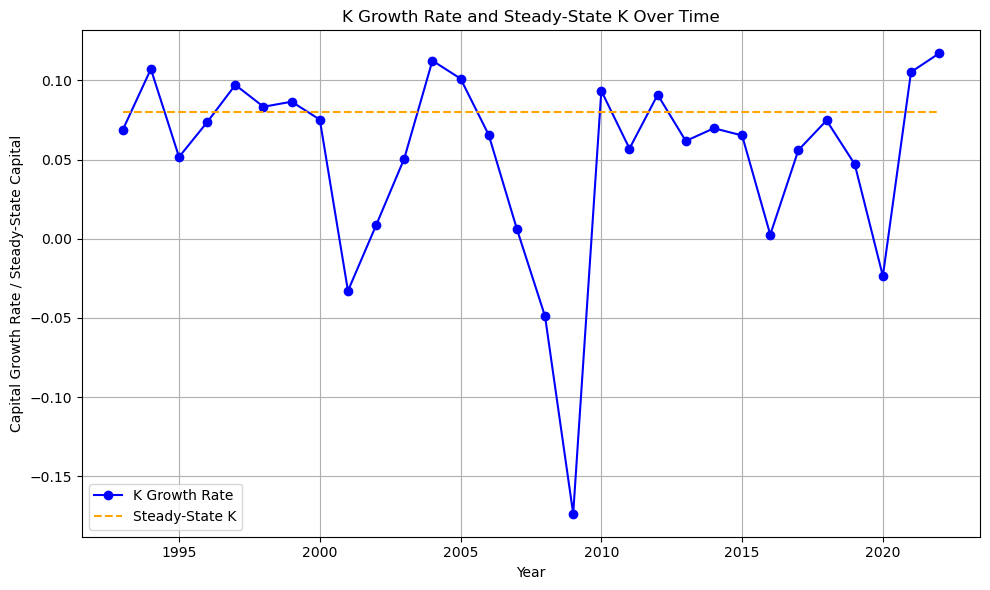

In [31]:
ldf = df[(df["Country Name"] == "United States") & (df["Year"] > 1992) & (df["Year"] < 2023)].sort_values("Year")
plt.figure(figsize=(10, 6))
plt.plot(ldf["Year"], ldf["K Growth Rate"], label="K Growth Rate", marker="o", color="blue")
plt.plot(ldf["Year"], ldf["SSK"], label="Steady-State K", linestyle="--", color="orange")
plt.xlabel("Year")
plt.ylabel("Capital Growth Rate / Steady-State Capital")
plt.title("K Growth Rate and Steady-State K Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**This is consistent with data because we see that the actual level of k hovers around steady state except during financial crises like during 2008/2009 Financial Crises and during 2020 pandemic.** Then replicate this 3 more times for other countries and explain too like Argentina it has a crises in 2001.

*****below is the conceptual visualization of steady state k* so put this one above our main findings and then explain it in terms of the formula. Also can replicate this for 3 other countries and make like a 4-subplot thing like in the first visualization.**

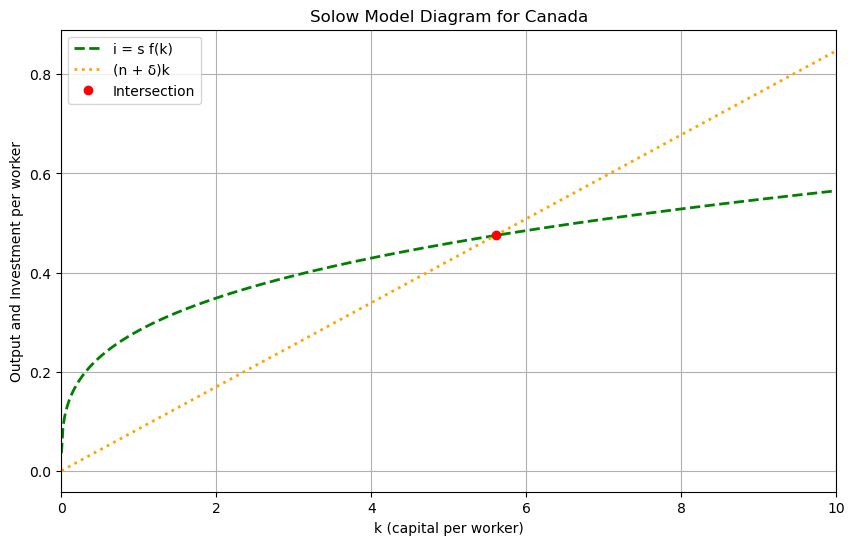

Intersection point:
k* = 5.611661322645292
i* = 0.47508054841171227


In [23]:

# Load the merged dataset
df = pd.read_excel("Final_Dataset.xlsx")

# Choose a country
country_name = "Canada"

# Filter for the chosen country
country_data = df[df["Country Name"] == country_name].copy()
if country_data.empty:
    raise ValueError(f"No data found for {country_name}")

# Extract parameters from your dataset (averages to smooth out noise)
s = country_data[country_data["Year"] == 2023]["Savings Rate"].values[0]  # Savings rate for 1992
n = country_data[country_data["Year"] == 2023]["Labour Force Growth Rate"].values[0]  # Labor force growth rate for 1992

# Set model parameters
alpha = 0.3     # Capital share in production
delta = 0.05     # Depreciation rate
A = 1.0          # Technology level (assumed constant)

# Define a range of k (capital per worker) values for the plot: 0 < k < 10
k_values = np.linspace(0.001, 10, 500)  # start from a small positive number to avoid division issues

# Compute the functions
# y_values = A * (k_values ** alpha)  # Commented out as requested
y_values = A * (k_values ** alpha)
investment_values = s * y_values             # i = s f(k)
break_even_values = (n + delta) * k_values   # (n+δ)k

plt.figure(figsize=(10, 6))
# plt.plot(k_values, y_values, label="y = f(k) = A k^alpha", linewidth=2, linestyle='-') # Commented out as requested
plt.plot(k_values, investment_values, label="i = s f(k)", linewidth=2, linestyle='--', color='green')
plt.plot(k_values, break_even_values, label="(n + δ)k", linewidth=2, linestyle=':', color='orange')

plt.xlim(0, 10)
plt.title(f"Solow Model Diagram for {country_name}")
plt.xlabel("k (capital per worker)")
plt.ylabel("Output and Investment per worker")
plt.legend()
plt.grid(True)

# Numerically find the intersection point between the green and orange lines
diff = np.abs(investment_values - break_even_values)
idx = diff.argmin()  # index of the closest intersection
k_star = k_values[idx]
i_star = investment_values[idx]

# Add a dot at the intersection point
plt.plot(k_star, i_star, 'o', color='red', label="Intersection")

plt.legend()
plt.show()

# Print the intersection point
print("Intersection point:")
print("k* =", k_star)
print("i* =", i_star)


**Then the following code will be our substitution for the IRF functions. We can just straight up say we didn't have a strong enough conceptual understanding or the necessary knowledge to create a VAR simulation of the IRF functions, so instead, we created this visualization to display shocks in k, both positive and negative, and simulate how it eventually will go back to steady state after a certain time**

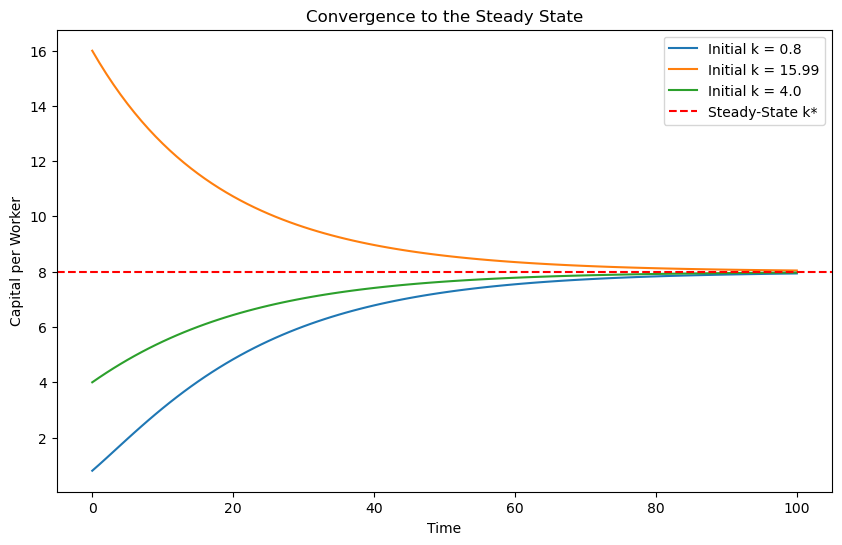

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 0.3       # saving rate
delta = 0.05  # depreciation rate
n = 0.02      # population growth rate
alpha = 0.3   # capital share
A = 1         # TFP

# Compute steady-state capital per worker
k_star = ((s * A) / (n + delta))**(1/(1 - alpha))

# Let's say we have three economies with different initial conditions
initial_capitals = [0.1*k_star, 2*k_star, 0.5*k_star]  # some start below, some above

time_steps = 100
fig, ax = plt.subplots(figsize=(10,6))

for k0 in initial_capitals:
    k_path = [k0]
    k = k0
    for t in range(time_steps):
        # Law of motion: k_{t+1} = s A k_t^alpha + (1 - delta - n) k_t
        k = s*A*k**alpha + (1 - delta - n)*k
        k_path.append(k)
    ax.plot(k_path, label=f"Initial k = {round(k0, 2)}")

# Plot the steady-state line
ax.axhline(y=k_star, color='red', linestyle='--', label='Steady-State k*')

ax.set_xlabel("Time")
ax.set_ylabel("Capital per Worker")
ax.set_title("Convergence to the Steady State")
ax.legend()
plt.show()
